In [63]:
# Imported required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tabulate import tabulate
import warnings
import sys

# Suppressing warnings properly
warnings.filterwarnings('ignore')
# Additional method to suppress warnings in case the above doesn't catch all
if not sys.warnoptions:
    import os
    os.environ["PYTHONWARNINGS"] = "ignore"

# Setting random seed for reproducibility
np.random.seed(42)

# Loading the dataset
df = pd.read_csv(r'C:\Users\test\Downloads\global_energy_consumption.csv')

# Displaying first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print("=" * 80)
print(tabulate(df.head(), headers='keys', tablefmt='simple', showindex=True))

# Displaying basic dataset information
print("\nDataset Overview:")
print("-" * 50)
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

print("\nColumns and their data types:")
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

# Checking for missing values
print("\nMissing Values:")
print("-" * 50)
missing = df.isnull().sum()
if missing.sum() > 0:
    print(tabulate(pd.DataFrame(missing[missing > 0]), 
                  headers=['Column', 'Missing Count'], 
                  tablefmt='simple'))
else:
    print("No missing values found")


First 5 rows of the dataset:
    Country      Year    Total Energy Consumption (TWh)    Per Capita Energy Use (kWh)    Renewable Energy Share (%)    Fossil Fuel Dependency (%)    Industrial Energy Use (%)    Household Energy Use (%)    Carbon Emissions (Million Tons)    Energy Price Index (USD/kWh)
--  ---------  ------  --------------------------------  -----------------------------  ----------------------------  ----------------------------  ---------------------------  --------------------------  ---------------------------------  ------------------------------
 0  Canada       2018                           9525.38                        42301.4                         13.7                          70.47                        45.18                       19.96                            3766.11                            0.12
 1  Germany      2020                           7922.08                        36601.4                         33.63                         41.95           

In [65]:
# Displaying basic information about the dataset
print("\nBasic Dataset Information:")
print("-" * 50)
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print("\nColumns in dataset:")
for col in df.columns:
    print(f"- {col}")


Basic Dataset Information:
--------------------------------------------------
Number of Rows: 10000
Number of Columns: 10

Columns in dataset:
- Country
- Year
- Total Energy Consumption (TWh)
- Per Capita Energy Use (kWh)
- Renewable Energy Share (%)
- Fossil Fuel Dependency (%)
- Industrial Energy Use (%)
- Household Energy Use (%)
- Carbon Emissions (Million Tons)
- Energy Price Index (USD/kWh)


In [67]:
# Identifying numeric and categorical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print("\nNumeric Columns:")
print("-" * 50)
for col in numeric_columns:
    print(f"- {col}")

print("\nCategorical Columns:")
print("-" * 50)
for col in categorical_columns:
    print(f"- {col}")


Numeric Columns:
--------------------------------------------------
- Year
- Total Energy Consumption (TWh)
- Per Capita Energy Use (kWh)
- Renewable Energy Share (%)
- Fossil Fuel Dependency (%)
- Industrial Energy Use (%)
- Household Energy Use (%)
- Carbon Emissions (Million Tons)
- Energy Price Index (USD/kWh)

Categorical Columns:
--------------------------------------------------
- Country


In [69]:
import pandas as pd
from tabulate import tabulate  # Makeing sure to import tabulate

print("\nStatistical Summary of Numeric Features:")
print("=" * 80)

# Getting the statistical summary and round to 2 decimal places
stats_df = df[numeric_columns].describe().round(2)

# Format with tabulate to add grids and boxes
df = tabulate(stats_df, headers='keys', tablefmt='fancy_grid')

# Printing the formatted statistics with grid and box styling
print(df)


Statistical Summary of Numeric Features:
╒═══════╤══════════╤══════════════════════════════════╤═══════════════════════════════╤══════════════════════════════╤══════════════════════════════╤═════════════════════════════╤════════════════════════════╤═══════════════════════════════════╤════════════════════════════════╕
│       │     Year │   Total Energy Consumption (TWh) │   Per Capita Energy Use (kWh) │   Renewable Energy Share (%) │   Fossil Fuel Dependency (%) │   Industrial Energy Use (%) │   Household Energy Use (%) │   Carbon Emissions (Million Tons) │   Energy Price Index (USD/kWh) │
╞═══════╪══════════╪══════════════════════════════════╪═══════════════════════════════╪══════════════════════════════╪══════════════════════════════╪═════════════════════════════╪════════════════════════════╪═══════════════════════════════════╪════════════════════════════════╡
│ count │ 10000    │                         10000    │                      10000    │                     10000    │      

Numeric columns used for correlation:
['Year', 'Total Energy Consumption (TWh)', 'Per Capita Energy Use (kWh)', 'Renewable Energy Share (%)', 'Fossil Fuel Dependency (%)', 'Industrial Energy Use (%)', 'Household Energy Use (%)', 'Carbon Emissions (Million Tons)', 'Energy Price Index (USD/kWh)']


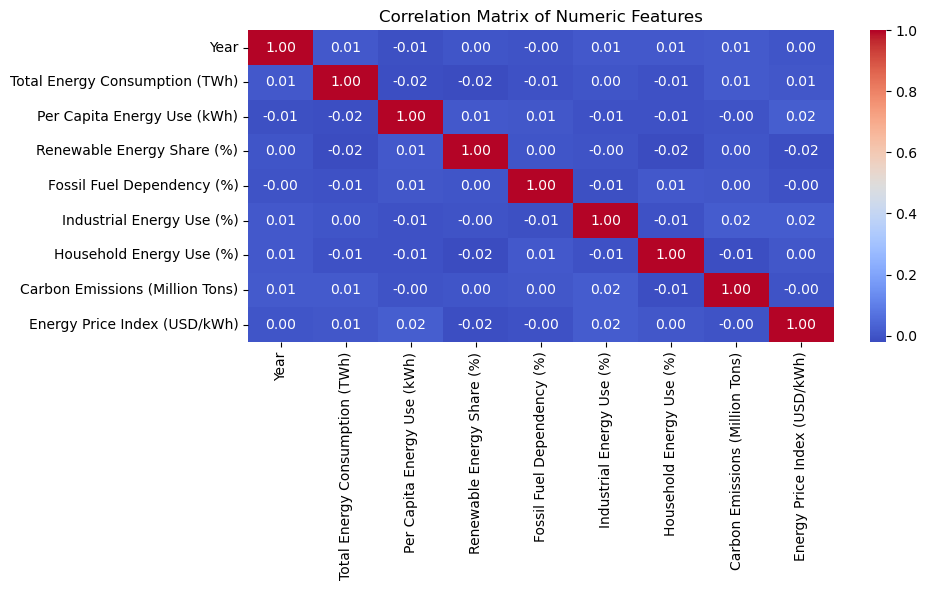

In [85]:


# Identify numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Display the numeric columns (optional)
print("Numeric columns used for correlation:")
print(numeric_columns)

# Create correlation matrix
plt.figure(figsize=(10, 6))
correlation = df[numeric_columns].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

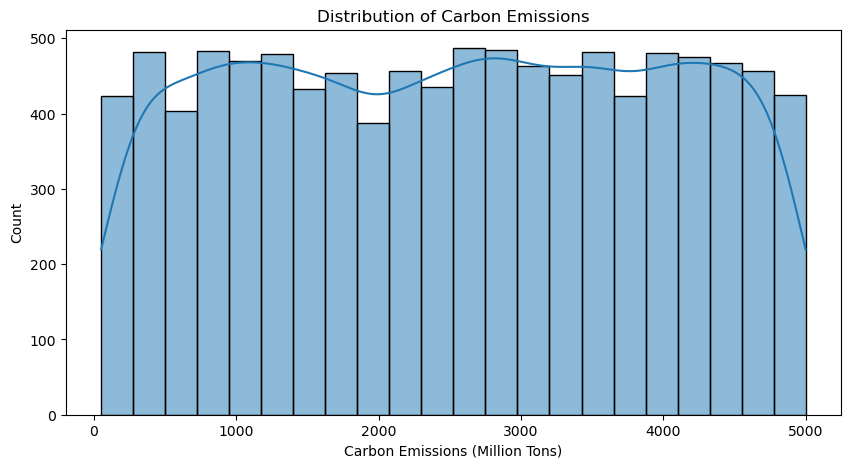

In [87]:
# Distribution of Carbon Emissions
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Carbon Emissions (Million Tons)', kde=True)
plt.title('Distribution of Carbon Emissions')
plt.xlabel('Carbon Emissions (Million Tons)')
plt.ylabel('Count')
plt.show()

In [93]:
# Printing key insights
print("\nKey Insights:")
print("-" * 50)
print(f"1. Average Carbon Emissions: {df['Carbon Emissions (Million Tons)'].mean():.2f} Million Tons")
print(f"2. Maximum Carbon Emissions: {df['Carbon Emissions (Million Tons)'].max():.2f} Million Tons")
print(f"3. Minimum Carbon Emissions: {df['Carbon Emissions (Million Tons)'].min():.2f} Million Tons")

# Top correlations with Carbon Emissions
correlations = correlation['Carbon Emissions (Million Tons)'].sort_values(ascending=False)
print("\nTop 3 Features Correlated with Carbon Emissions:")
print(correlations[1:4].to_string())


Key Insights:
--------------------------------------------------
1. Average Carbon Emissions: 2536.15 Million Tons
2. Maximum Carbon Emissions: 4999.34 Million Tons
3. Minimum Carbon Emissions: 50.64 Million Tons

Top 3 Features Correlated with Carbon Emissions:
Industrial Energy Use (%)         0.017964
Total Energy Consumption (TWh)    0.013643
Year                              0.013437


In [95]:
# Feature Selection and Preparation
# Selecting features for modeling
print("Step 1: Selecting Features")
print("-" * 50)

# Drop non-numeric or unnecessary columns
features = ['Total Energy Consumption (TWh)', 
           'Per Capita Energy Use (kWh)',
           'Renewable Energy Share (%)', 
           'Fossil Fuel Dependency (%)',
           'Industrial Energy Use (%)', 
           'Household Energy Use (%)',
           'Energy Price Index (USD/kWh)']

X = df[features]
y = df['Carbon Emissions (Million Tons)']

print("Selected features:")
for feature in features:
    print(f"- {feature}")

Step 1: Selecting Features
--------------------------------------------------
Selected features:
- Total Energy Consumption (TWh)
- Per Capita Energy Use (kWh)
- Renewable Energy Share (%)
- Fossil Fuel Dependency (%)
- Industrial Energy Use (%)
- Household Energy Use (%)
- Energy Price Index (USD/kWh)


In [97]:
# Checking for missing values and handle them
print("\nStep 2: Checking for Missing Values")
print("-" * 50)
missing_values = X.isnull().sum()
print("Missing values in each feature:")
print(missing_values)

if missing_values.sum() > 0:
    # If there are missing values, fill them with median
    X = X.fillna(X.median())
    print("\nMissing values have been filled with median values")


Step 2: Checking for Missing Values
--------------------------------------------------
Missing values in each feature:
Total Energy Consumption (TWh)    0
Per Capita Energy Use (kWh)       0
Renewable Energy Share (%)        0
Fossil Fuel Dependency (%)        0
Industrial Energy Use (%)         0
Household Energy Use (%)          0
Energy Price Index (USD/kWh)      0
dtype: int64


In [99]:
#  Spliting the data into training and testing sets
print("\nStep 3: Splitting Data")
print("-" * 50)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Step 3: Splitting Data
--------------------------------------------------
Training set size: 8000 samples
Testing set size: 2000 samples


In [103]:
# Scaling the features
print("\nStep 4: Feature Scaling")
print("-" * 50)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features have been scaled using StandardScaler")
print(f"Mean of scaled features should be close to 0: {np.mean(X_train_scaled):.3f}")
print(f"Standard deviation of scaled features should be close to 1: {np.std(X_train_scaled):.3f}")


Step 4: Feature Scaling
--------------------------------------------------
Features have been scaled using StandardScaler
Mean of scaled features should be close to 0: -0.000
Standard deviation of scaled features should be close to 1: 1.000



Step 5: Model Training and Comparison
--------------------------------------------------
Model Performance Comparison:
--------------------------------------------------
Training RMSE: 542.59
Testing RMSE: 1469.13
Training R² Score: 0.85
Testing R² Score: -0.06


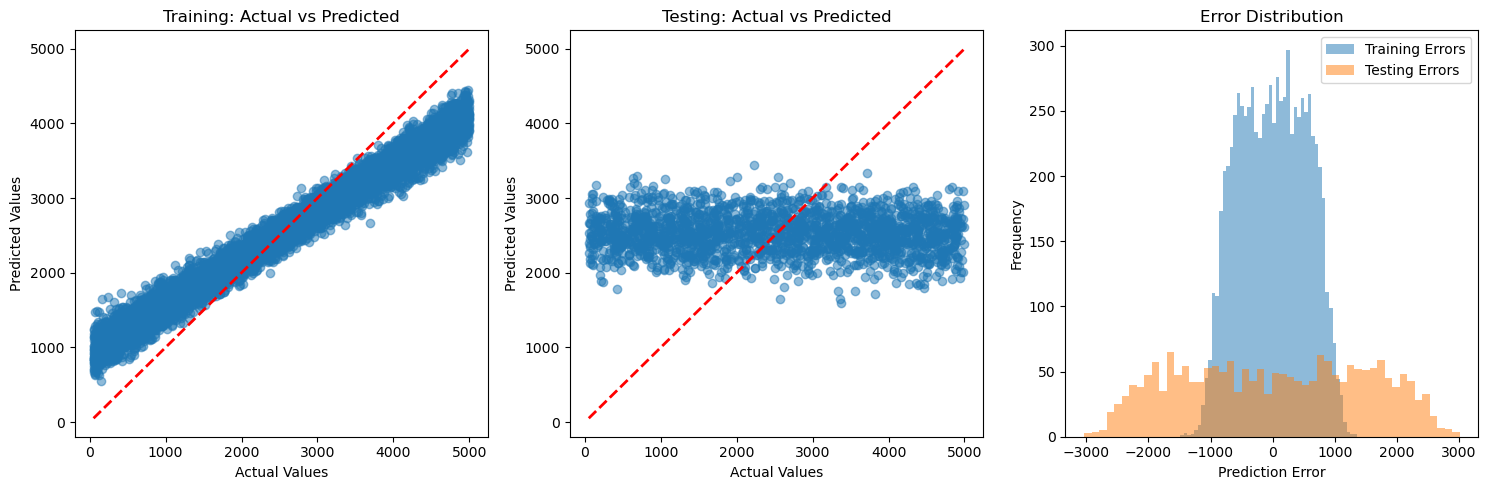

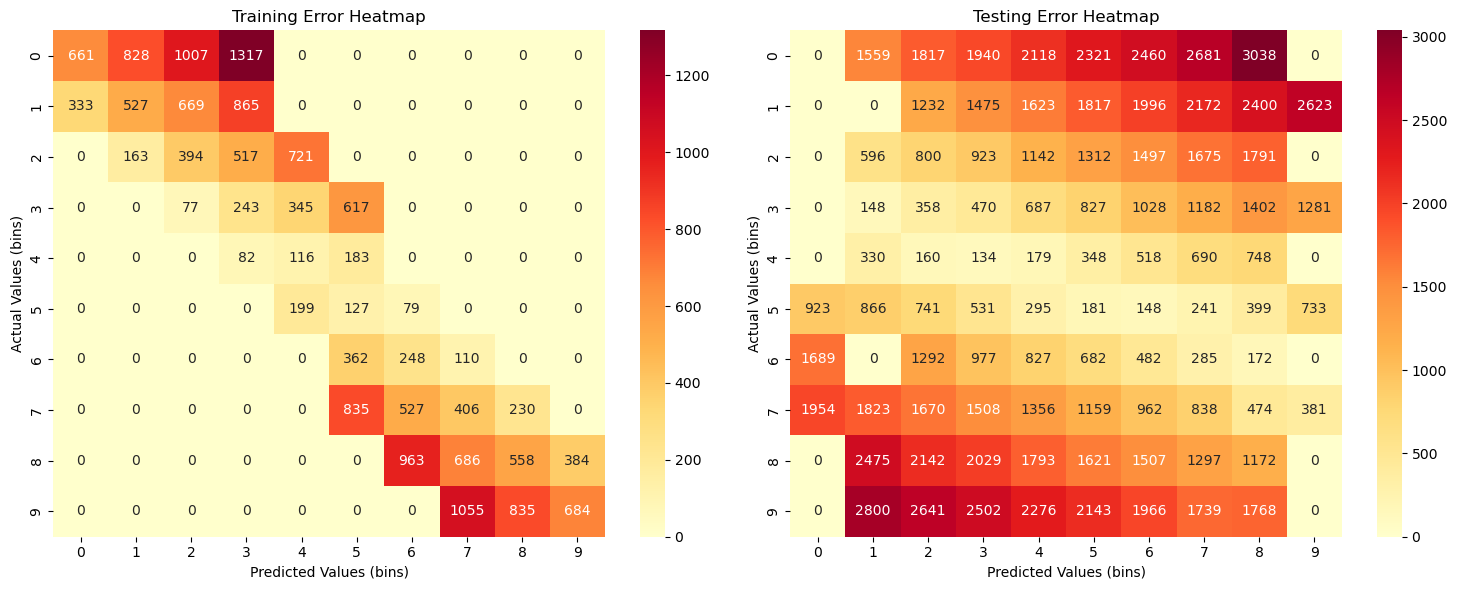


Detailed Error Analysis:
--------------------------------------------------
Training Set:
Mean Absolute Error: 462.40
Mean Squared Error: 294404.84
Root Mean Squared Error: 542.59

Testing Set:
Mean Absolute Error: 1274.78
Mean Squared Error: 2158329.02
Root Mean Squared Error: 1469.13

Overfitting Analysis:
--------------------------------------------------
RMSE Difference (Train vs Test): 926.53
R² Difference (Train vs Test): 0.91


In [111]:
# Step 5: Model Training and Comparison
print("\nStep 5: Model Training and Comparison")
print("-" * 50)

# Train a basic random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions for both train and test sets
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

# Calculate performance metrics for both sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print comparison
print("Model Performance Comparison:")
print("-" * 50)
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}")
print(f"Training R² Score: {train_r2:.2f}")
print(f"Testing R² Score: {test_r2:.2f}")

# Create visualization comparing train and test results
plt.figure(figsize=(15, 5))

# Plot 1: Training Data
plt.subplot(1, 3, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Training: Actual vs Predicted')

# Plot 2: Testing Data
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Testing: Actual vs Predicted')

# Plot 3: Error Distribution Comparison
plt.subplot(1, 3, 3)
train_errors = y_train - y_train_pred
test_errors = y_test - y_test_pred
plt.hist(train_errors, bins=50, alpha=0.5, label='Training Errors')
plt.hist(test_errors, bins=50, alpha=0.5, label='Testing Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.legend()

plt.tight_layout()
plt.show()

# Create error heatmaps for both training and testing
plt.figure(figsize=(15, 6))

# Training Error Heatmap
plt.subplot(1, 2, 1)
train_error_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
train_error_df['Error'] = abs(train_error_df['Actual'] - train_error_df['Predicted'])

bins = 10
train_error_matrix = np.zeros((bins, bins))
train_actual_bins = np.linspace(y_train.min(), y_train.max(), bins+1)
train_pred_bins = np.linspace(y_train_pred.min(), y_train_pred.max(), bins+1)

for i in range(bins):
    for j in range(bins):
        mask = (
            (train_error_df['Actual'] >= train_actual_bins[i]) & 
            (train_error_df['Actual'] < train_actual_bins[i+1]) & 
            (train_error_df['Predicted'] >= train_pred_bins[j]) & 
            (train_error_df['Predicted'] < train_pred_bins[j+1])
        )
        train_error_matrix[i, j] = train_error_df.loc[mask, 'Error'].mean() if mask.any() else 0

sns.heatmap(train_error_matrix, cmap='YlOrRd', annot=True, fmt='.0f')
plt.xlabel('Predicted Values (bins)')
plt.ylabel('Actual Values (bins)')
plt.title('Training Error Heatmap')

# Testing Error Heatmap
plt.subplot(1, 2, 2)
test_error_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
test_error_df['Error'] = abs(test_error_df['Actual'] - test_error_df['Predicted'])

test_error_matrix = np.zeros((bins, bins))
test_actual_bins = np.linspace(y_test.min(), y_test.max(), bins+1)
test_pred_bins = np.linspace(y_test_pred.min(), y_test_pred.max(), bins+1)

for i in range(bins):
    for j in range(bins):
        mask = (
            (test_error_df['Actual'] >= test_actual_bins[i]) & 
            (test_error_df['Actual'] < test_actual_bins[i+1]) & 
            (test_error_df['Predicted'] >= test_pred_bins[j]) & 
            (test_error_df['Predicted'] < test_pred_bins[j+1])
        )
        test_error_matrix[i, j] = test_error_df.loc[mask, 'Error'].mean() if mask.any() else 0

sns.heatmap(test_error_matrix, cmap='YlOrRd', annot=True, fmt='.0f')
plt.xlabel('Predicted Values (bins)')
plt.ylabel('Actual Values (bins)')
plt.title('Testing Error Heatmap')

plt.tight_layout()
plt.show()

# Print detailed error analysis
print("\nDetailed Error Analysis:")
print("-" * 50)
print("Training Set:")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred):.2f}")
print(f"Mean Squared Error: {train_mse:.2f}")
print(f"Root Mean Squared Error: {train_rmse:.2f}")

print("\nTesting Set:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred):.2f}")
print(f"Mean Squared Error: {test_mse:.2f}")
print(f"Root Mean Squared Error: {test_rmse:.2f}")

# Check for overfitting
print("\nOverfitting Analysis:")
print("-" * 50)
rmse_diff = abs(train_rmse - test_rmse)
r2_diff = abs(train_r2 - test_r2)
print(f"RMSE Difference (Train vs Test): {rmse_diff:.2f}")
print(f"R² Difference (Train vs Test): {r2_diff:.2f}")

if train_r2 - test_r2 > 0.1:
    print("Warning: Model might be overfitting (R² difference > 0.1)")
else:
    print("Model shows no significant signs of overfitting")


Step 6: Feature Importance Analysis
--------------------------------------------------
Feature Importance Ranking:
                          Feature  Importance
0  Total Energy Consumption (TWh)    0.151714
3      Fossil Fuel Dependency (%)    0.148729
5        Household Energy Use (%)    0.147556
2      Renewable Energy Share (%)    0.147387
1     Per Capita Energy Use (kWh)    0.147270
4       Industrial Energy Use (%)    0.146109
6    Energy Price Index (USD/kWh)    0.111236


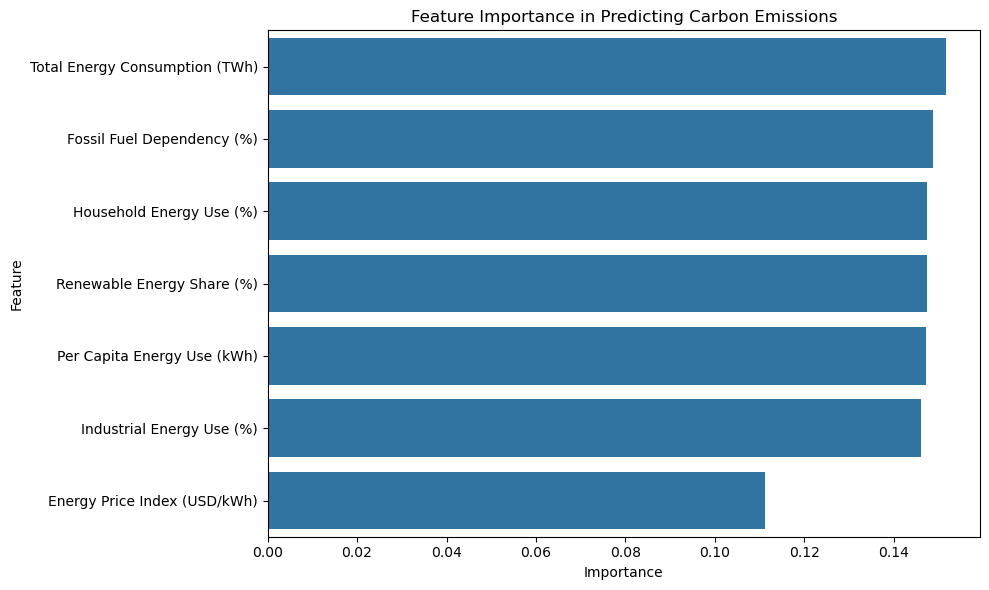

In [107]:
# Feature Importance Analysis
print("\nStep 6: Feature Importance Analysis")
print("-" * 50)
# Get feature importance
importance = rf_model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importance
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("Feature Importance Ranking:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Predicting Carbon Emissions')
plt.tight_layout()
plt.show()